In [1]:
## Analysis

In [2]:
## Libraries

In [3]:
import pandas as pd 
from heatmap import heatmap, corrplot
import pingouin as pg
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions


In [4]:
## Dataset

In [5]:
data = pd.read_csv('survey_results.csv')  ## import csv file with the survey results
data.head()

,Age,Gender,Sexual_orientation,School,Religion,Income,Personal_Sincerity,Personal_Loyalty,Personal_Self_confidence,Personal_Braveness,...,Money_val,Attractiveness_val,Intelligence_val,Charisma_val,Spirituality_val,Generosity_val,Kindness_val,Adventurous_val,Fun_val,Energetic_val
0,28,Male,Heterosexual,Bachelor,Atheist,1600 - 2000 euros,6,7,4,5,...,0.0,2.0,-1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
1,31,Male,Heterosexual,High school,Christian,1000 - 1300 euros,7,7,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,Female,Heterosexual,Master,Christian,1000 - 1300 euros,6,8,4,6,...,5.0,3.0,2.0,-2.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
3,28,Male,Heterosexual,Master,Atheist,1600 - 2000 euros,8,8,8,8,...,2.0,3.0,1.0,0.0,-5.0,0.0,0.0,0.0,0.0,-4.0
4,27,Male,Heterosexual,Bachelor,Pastafarianism,800 - 1000 euros,6,7,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## Define some functions

In [7]:
## perform anova (1 way or 2 way)

def anova_test(var_num, var_bins, dframe):
    an = pg.anova(dv=var_num, between=var_bins, data=dframe, ss_type=2,detailed=False,effsize='np2').round(3)
    return print(an)

In [8]:
## better distribution

def dist_data(parameter):
    par = parameter.values    ## Before we supply the data to Fitter we need to convert it to a NumPy array. 
    f = Fitter(par, distributions= get_common_distributions())   ## check distr
    f.fit()                                                       ## try to fit
    f.summary()                                                   ## sumarise all info
    return f.get_best(method = 'sumsquare_error')   ## get best distribution

# Analysis by Relationship Parameter
## Relationship_Respect

In [9]:
anova_test('Relationship_Respect', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.099  0.016  0.528


In [10]:
anova_test('Relationship_Respect', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.131   0.04  0.242


In [11]:
anova_test('Relationship_Respect', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  5.448    0.0  0.299


In [12]:
anova_test('Relationship_Respect', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.539   0.18  0.128


In [13]:
anova_test('Relationship_Respect', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  2.236  0.139  0.032


In [14]:
anova_test('Relationship_Respect', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  31.269    0.0  0.953


In [15]:
anova_test('Relationship_Respect', 'Relationship_rate', data)

              Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_rate      3     66  11.061    0.0  0.335


In [16]:
anova_test('Relationship_Respect', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc   np2
0  Time_together     34     35  0.876  0.649  0.46


In [17]:
anova_test('Relationship_Respect', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4406.396  24.0  183.600  374.694  0.000  0.996
1        Gender     0.052   1.0    0.052    0.106  0.747  0.003
2  Age * Gender    77.252  24.0    3.219    6.569  0.000  0.818
3      Residual    17.150  35.0    0.490      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


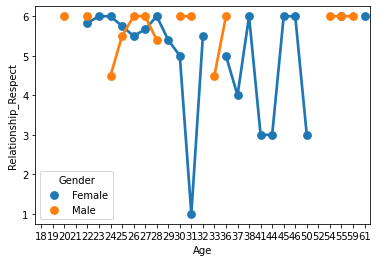

In [19]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Respect', hue='Gender', data=abc)

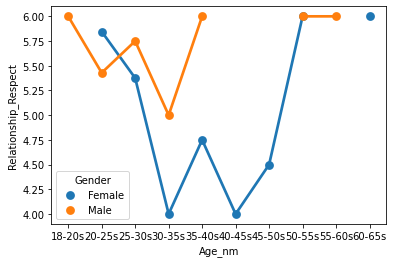

In [21]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Respect', hue='Gender', data=abc)

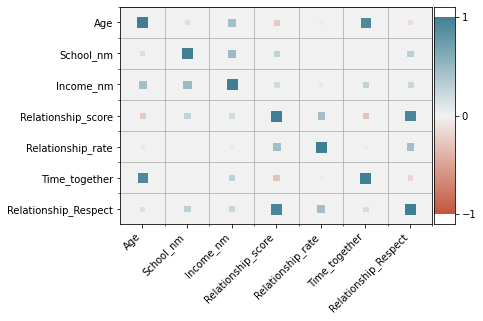

In [22]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Respect']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

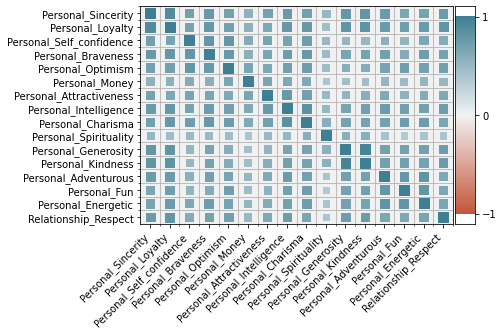

In [23]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Respect']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Vulnerability

In [24]:
anova_test('Relationship_Vulnerability', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.769  0.049  0.485


In [25]:
anova_test('Relationship_Vulnerability', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  0.679  0.725  0.092


In [26]:
anova_test('Relationship_Vulnerability', 'School_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  School_nm      5     64  1.59  0.176  0.111


In [27]:
anova_test('Relationship_Vulnerability', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  2.228  0.052  0.175


In [28]:
anova_test('Relationship_Vulnerability', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.844  0.179  0.026


In [29]:
anova_test('Relationship_Vulnerability', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  5.424    0.0  0.777


In [30]:
anova_test('Relationship_Vulnerability', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  2.869  0.043  0.115


In [31]:
anova_test('Relationship_Vulnerability', 'Time_together', data)

          Source  ddof1  ddof2     F  p-unc    np2
0  Time_together     34     35  0.91  0.608  0.469


In [32]:
anova_test('Relationship_Vulnerability', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc   np2
0           Age  3733.694  24.0  155.571  140.697  0.000  0.99
1        Gender     0.003   1.0    0.003    0.002  0.961  0.00
2  Age * Gender    58.024  24.0    2.418    2.187  0.017  0.60
3      Residual    38.700  35.0    1.106      NaN    NaN   NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


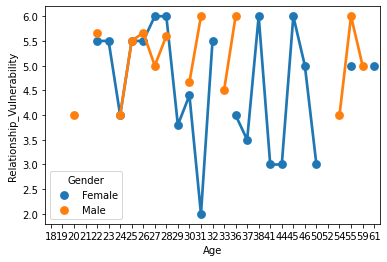

In [33]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Vulnerability', hue='Gender', data=abc)

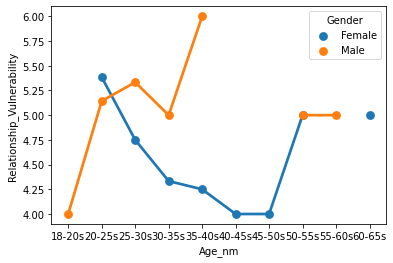

In [34]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Vulnerability', hue='Gender', data=abc)

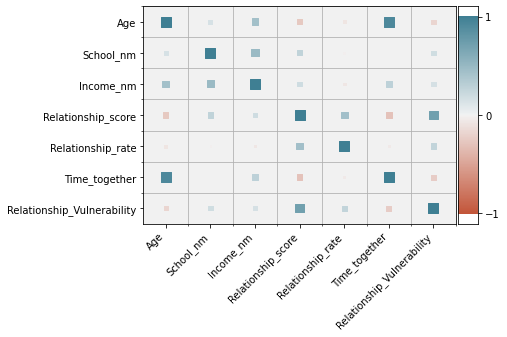

In [35]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Vulnerability']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

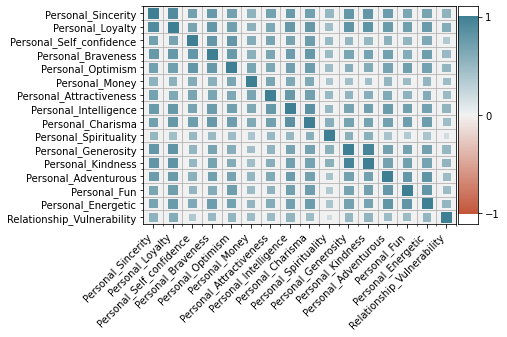

In [36]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Vulnerability']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Trust

In [37]:
anova_test('Relationship_Trust', 'Age', data)

  Source  ddof1  ddof2      F  p-unc   np2
0    Age     24     45  1.803  0.043  0.49


In [38]:
anova_test('Relationship_Trust', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.168  0.037  0.245


In [39]:
anova_test('Relationship_Trust', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  4.793  0.001  0.272


In [40]:
anova_test('Relationship_Trust', 'Income_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  Income_nm      6     63  0.99   0.44  0.086


In [41]:
anova_test('Relationship_Trust', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  0.828  0.366  0.012


In [42]:
anova_test('Relationship_Trust', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  30.09    0.0  0.951


In [43]:
anova_test('Relationship_Trust', 'Relationship_rate', data)

              Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_rate      3     66  11.622    0.0  0.346


In [44]:
anova_test('Relationship_Trust', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.895  0.626  0.465


In [45]:
anova_test('Relationship_Trust', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4323.153  24.0  180.131  254.218  0.000  0.994
1        Gender     0.169   1.0    0.169    0.238  0.629  0.007
2  Age * Gender    66.755  24.0    2.781    3.925  0.000  0.729
3      Residual    24.800  35.0    0.709      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


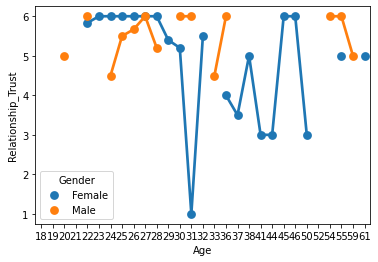

In [47]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Trust', hue='Gender', data=abc)

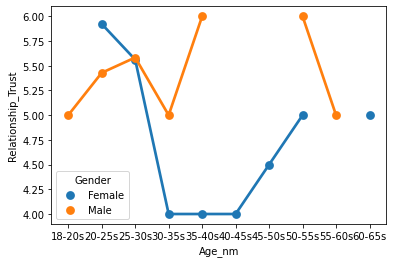

In [48]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Trust', hue='Gender', data=abc)

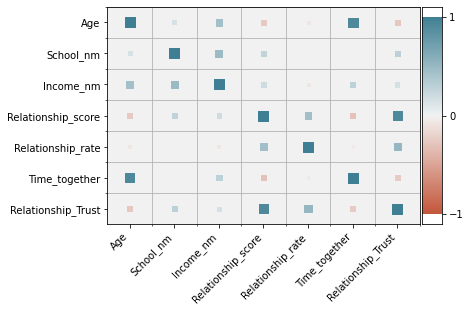

In [49]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Trust']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

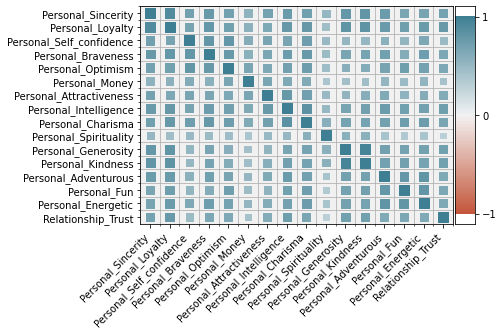

In [50]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Trust']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Honesty

In [51]:
anova_test('Relationship_Honesty', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.646  0.074  0.467


In [52]:
anova_test('Relationship_Honesty', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  1.488  0.173  0.183


In [53]:
anova_test('Relationship_Honesty', 'School_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  School_nm      5     64  3.16  0.013  0.198


In [54]:
anova_test('Relationship_Honesty', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.061  0.395  0.092


In [55]:
anova_test('Relationship_Honesty', 'Gender', data)

   Source  ddof1  ddof2     F  p-unc    np2
0  Gender      1     68  2.78    0.1  0.039


In [56]:
anova_test('Relationship_Honesty', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  10.736    0.0  0.873


In [57]:
anova_test('Relationship_Honesty', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  7.469    0.0  0.253


In [58]:
anova_test('Relationship_Honesty', 'Time_together', data)

          Source  ddof1  ddof2     F  p-unc  np2
0  Time_together     34     35  1.03  0.464  0.5


In [59]:
anova_test('Relationship_Honesty', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  3835.721  24.0  159.822  152.905  0.000  0.991
1        Gender     0.090   1.0    0.090    0.086  0.771  0.002
2  Age * Gender    54.378  24.0    2.266    2.168  0.018  0.598
3      Residual    36.583  35.0    1.045      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


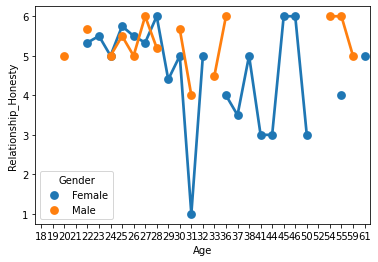

In [61]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Honesty', hue='Gender', data=abc)

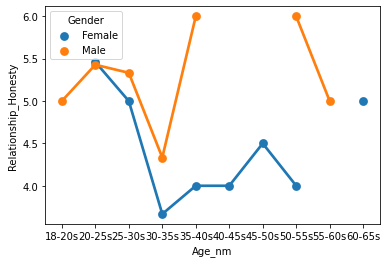

In [62]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Honesty', hue='Gender', data=abc)

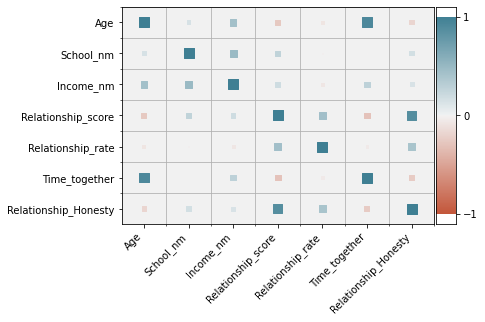

In [63]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Honesty']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

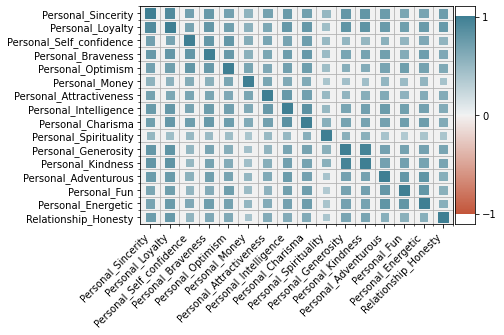

In [64]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Honesty']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Kindness

In [65]:
anova_test('Relationship_Kindness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.245  0.258  0.399


In [66]:
anova_test('Relationship_Kindness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  1.505  0.167  0.184


In [67]:
anova_test('Relationship_Kindness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.227  0.062  0.148


In [68]:
anova_test('Relationship_Kindness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.689  0.138  0.139


In [69]:
anova_test('Relationship_Kindness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  0.352  0.555  0.005


In [70]:
anova_test('Relationship_Kindness', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  8.705    0.0  0.848


In [71]:
anova_test('Relationship_Kindness', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  3.025  0.036  0.121


In [72]:
anova_test('Relationship_Kindness', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.985  0.517  0.489


In [73]:
anova_test('Relationship_Kindness', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  3352.222  24.0  139.676  103.064  0.000  0.986
1        Gender     1.276   1.0    1.276    0.941  0.339  0.026
2  Age * Gender    58.132  24.0    2.422    1.787  0.057  0.551
3      Residual    47.433  35.0    1.355      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


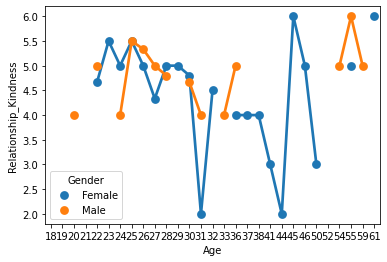

In [75]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Kindness', hue='Gender', data=abc)

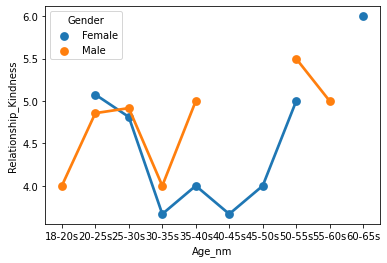

In [76]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Kindness', hue='Gender', data=abc)

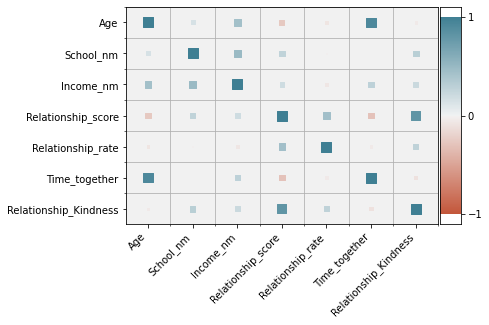

In [77]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Kindness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

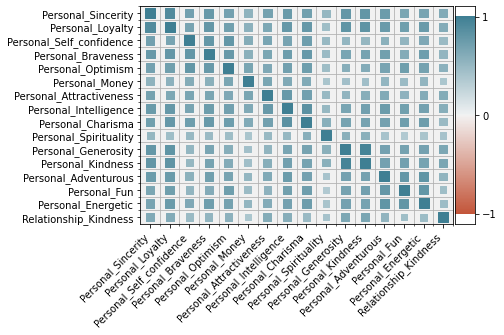

In [78]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Kindness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Boundaries

In [79]:
anova_test('Relationship_Boundaries', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.719  0.058  0.478


In [80]:
anova_test('Relationship_Boundaries', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  1.841  0.079  0.216


In [81]:
anova_test('Relationship_Boundaries', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc   np2
0  School_nm      5     64  1.583  0.178  0.11


In [82]:
anova_test('Relationship_Boundaries', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.579  0.168  0.131


In [83]:
anova_test('Relationship_Boundaries', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.883  0.174  0.027


In [84]:
anova_test('Relationship_Boundaries', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  13.534    0.0  0.897


In [85]:
anova_test('Relationship_Boundaries', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  6.254  0.001  0.221


In [86]:
anova_test('Relationship_Boundaries', 'Time_together', data)

          Source  ddof1  ddof2     F  p-unc    np2
0  Time_together     34     35  0.79  0.753  0.434


In [87]:
anova_test('Relationship_Boundaries', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  3708.075  24.0  154.503  167.678  0.000  0.991
1        Gender     0.002   1.0    0.002    0.002  0.963  0.000
2  Age * Gender    74.215  24.0    3.092    3.356  0.001  0.697
3      Residual    32.250  35.0    0.921      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


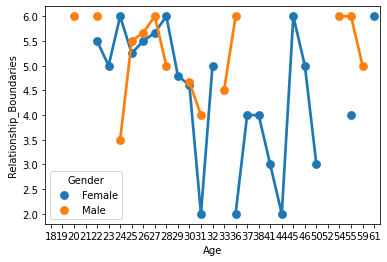

In [89]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Boundaries', hue='Gender', data=abc)

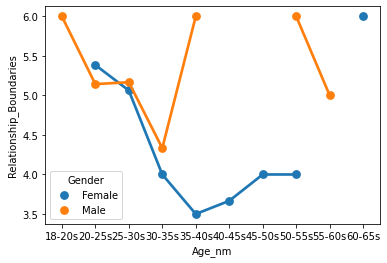

In [90]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Boundaries', hue='Gender', data=abc)

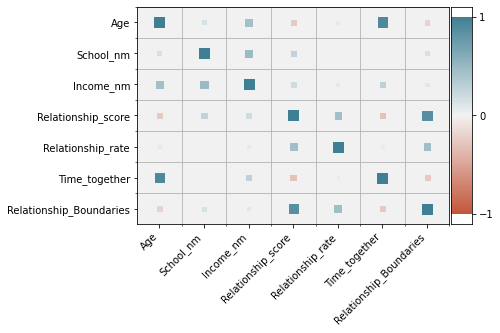

In [91]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Boundaries']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

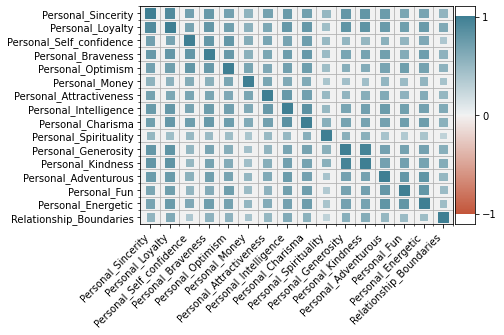

In [92]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Boundaries']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Commitment

In [93]:
anova_test('Relationship_Commitment', 'Age', data)

  Source  ddof1  ddof2      F  p-unc  np2
0    Age     24     45  1.874  0.034  0.5


In [94]:
anova_test('Relationship_Commitment', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.036   0.05  0.234


In [95]:
anova_test('Relationship_Commitment', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  4.992  0.001  0.281


In [96]:
anova_test('Relationship_Commitment', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.143  0.348  0.098


In [97]:
anova_test('Relationship_Commitment', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  2.967   0.09  0.042


In [98]:
anova_test('Relationship_Commitment', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc   np2
0  Relationship_score     27     42  15.814    0.0  0.91


In [99]:
anova_test('Relationship_Commitment', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc   np2
0  Relationship_rate      3     66  11.86    0.0  0.35


In [100]:
anova_test('Relationship_Commitment', 'Time_together', data)

          Source  ddof1  ddof2     F  p-unc    np2
0  Time_together     34     35  0.83  0.706  0.446


In [101]:
anova_test('Relationship_Commitment', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4365.539  24.0  181.897  295.197  0.000  0.995
1        Gender     0.014   1.0    0.014    0.023  0.879  0.001
2  Age * Gender    64.561  24.0    2.690    4.366  0.000  0.750
3      Residual    21.567  35.0    0.616      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


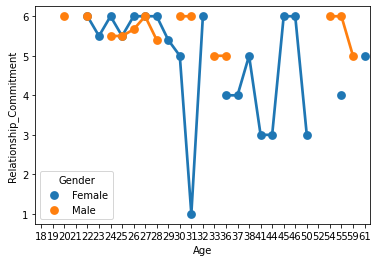

In [103]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Commitment', hue='Gender', data=abc)

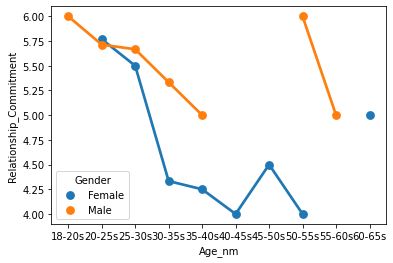

In [104]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Commitment', hue='Gender', data=abc)

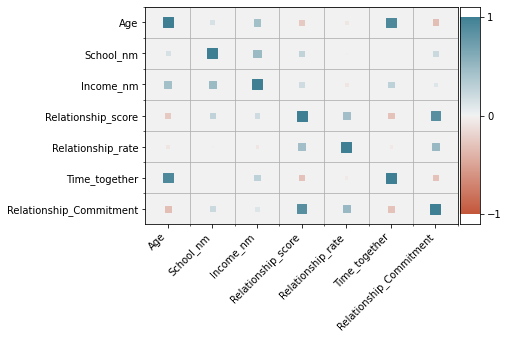

In [105]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Commitment']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

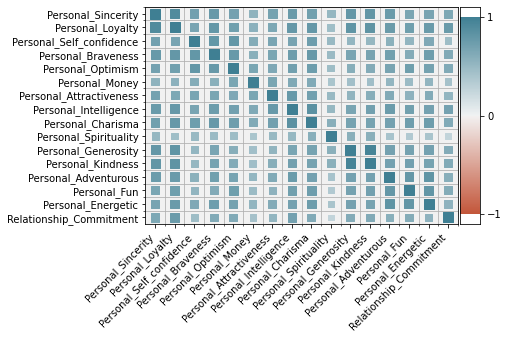

In [106]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Commitment']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Thoughtfulness

In [107]:
anova_test('Relationship_Thoughtfulness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.135  0.014  0.532


In [108]:
anova_test('Relationship_Thoughtfulness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.153  0.038  0.244


In [109]:
anova_test('Relationship_Thoughtfulness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  3.526  0.007  0.216


In [110]:
anova_test('Relationship_Thoughtfulness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.977  0.082  0.158


In [111]:
anova_test('Relationship_Thoughtfulness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.966  0.165  0.028


In [112]:
anova_test('Relationship_Thoughtfulness', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  31.964    0.0  0.954


In [113]:
anova_test('Relationship_Thoughtfulness', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc   np2
0  Relationship_rate      3     66  5.833  0.001  0.21


In [114]:
anova_test('Relationship_Thoughtfulness', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.917  0.599  0.471


In [115]:
anova_test('Relationship_Thoughtfulness', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4245.158  24.0  176.882  243.734  0.000  0.994
1        Gender     0.078   1.0    0.078    0.108  0.745  0.003
2  Age * Gender    69.902  24.0    2.913    4.013  0.000  0.733
3      Residual    25.400  35.0    0.726      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


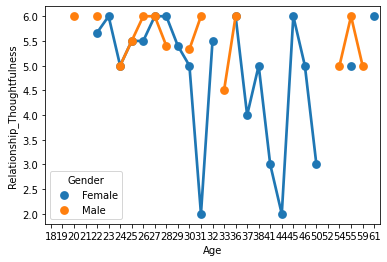

In [116]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Thoughtfulness', hue='Gender', data=abc)

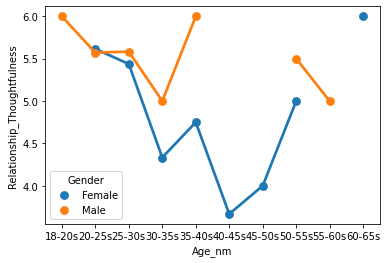

In [117]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Thoughtfulness', hue='Gender', data=abc)

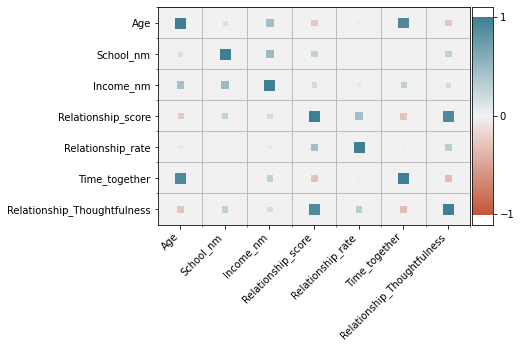

In [118]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Thoughtfulness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

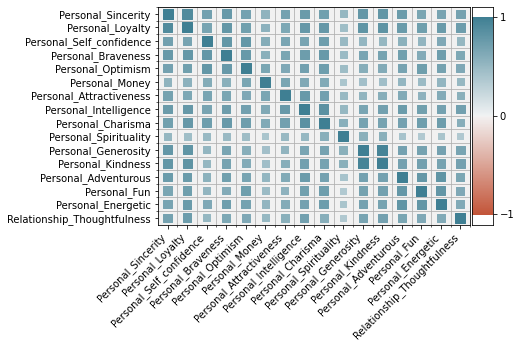

In [119]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Thoughtfulness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Forgiveness

In [120]:
anova_test('Relationship_Forgiveness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.104  0.015  0.529


In [121]:
anova_test('Relationship_Forgiveness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.297  0.027  0.256


In [122]:
anova_test('Relationship_Forgiveness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  3.671  0.006  0.223


In [123]:
anova_test('Relationship_Forgiveness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.354  0.247  0.114


In [124]:
anova_test('Relationship_Forgiveness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.439  0.234  0.021


In [125]:
anova_test('Relationship_Forgiveness', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  11.169    0.0  0.878


In [126]:
anova_test('Relationship_Forgiveness', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  4.446  0.007  0.168


In [127]:
anova_test('Relationship_Forgiveness', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.947  0.562  0.479


In [128]:
anova_test('Relationship_Forgiveness', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4048.374  24.0  168.682  205.114  0.000  0.993
1        Gender     0.288   1.0    0.288    0.351  0.557  0.010
2  Age * Gender    71.712  24.0    2.988    3.633  0.000  0.714
3      Residual    28.783  35.0    0.822      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


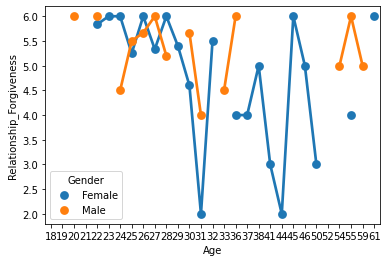

In [130]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Forgiveness', hue='Gender', data=abc)

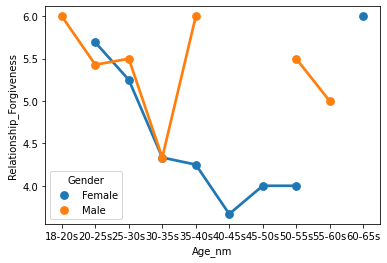

In [131]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Forgiveness', hue='Gender', data=abc)

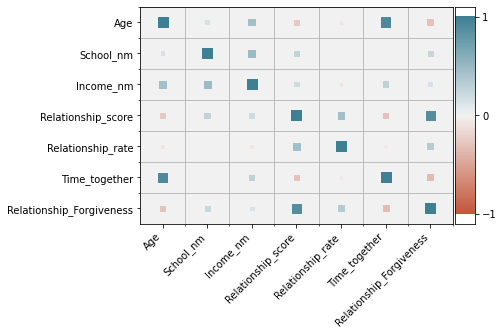

In [132]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Forgiveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

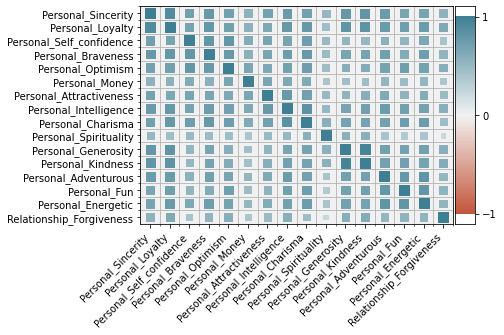

In [133]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Forgiveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Gentleness

In [134]:
anova_test('Relationship_Gentleness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.713  0.059  0.477


In [135]:
anova_test('Relationship_Gentleness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  1.998  0.055  0.231


In [136]:
anova_test('Relationship_Gentleness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.875  0.021  0.183


In [137]:
anova_test('Relationship_Gentleness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  2.352  0.041  0.183


In [138]:
anova_test('Relationship_Gentleness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  2.639  0.109  0.037


In [139]:
anova_test('Relationship_Gentleness', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  16.815    0.0  0.915


In [140]:
anova_test('Relationship_Gentleness', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  4.433  0.007  0.168


In [141]:
anova_test('Relationship_Gentleness', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.977  0.526  0.487


In [142]:
anova_test('Relationship_Gentleness', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4194.505  24.0  174.771  212.888  0.000  0.993
1        Gender     0.141   1.0    0.141    0.172  0.681  0.005
2  Age * Gender    65.785  24.0    2.741    3.339  0.001  0.696
3      Residual    28.733  35.0    0.821      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


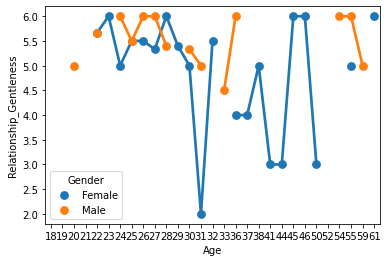

In [143]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Gentleness', hue='Gender', data=abc)

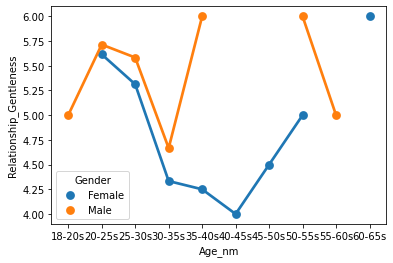

In [144]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Gentleness', hue='Gender', data=abc)

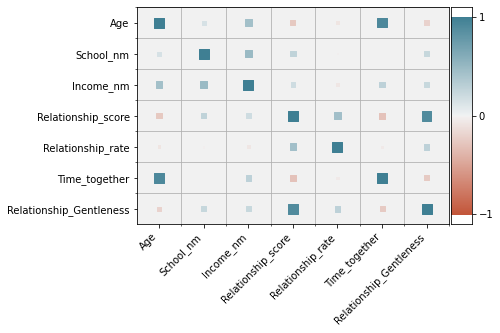

In [145]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Gentleness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

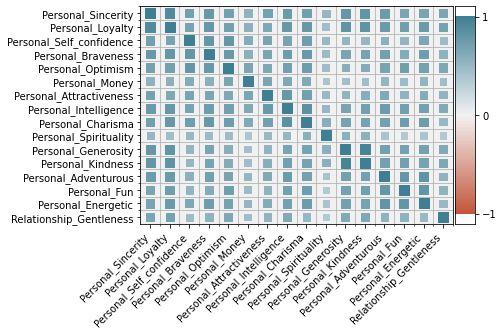

In [146]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Gentleness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Affection

In [147]:
anova_test('Relationship_Affection', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.333  0.007  0.554


In [148]:
anova_test('Relationship_Affection', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.115  0.042  0.241


In [149]:
anova_test('Relationship_Affection', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  4.148  0.003  0.245


In [150]:
anova_test('Relationship_Affection', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  2.452  0.034  0.189


In [151]:
anova_test('Relationship_Affection', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc   np2
0  Gender      1     68  2.107  0.151  0.03


In [152]:
anova_test('Relationship_Affection', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  23.623    0.0  0.938


In [153]:
anova_test('Relationship_Affection', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc   np2
0  Relationship_rate      3     66  6.586  0.001  0.23


In [154]:
anova_test('Relationship_Affection', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.929  0.584  0.474


In [155]:
anova_test('Relationship_Affection', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4403.714  24.0  183.488  357.776  0.000  0.996
1        Gender     0.064   1.0    0.064    0.125  0.726  0.004
2  Age * Gender    56.681  24.0    2.362    4.605  0.000  0.759
3      Residual    17.950  35.0    0.513      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


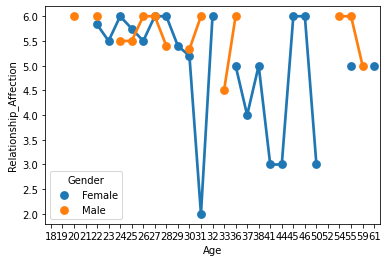

In [157]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Affection', hue='Gender', data=abc)

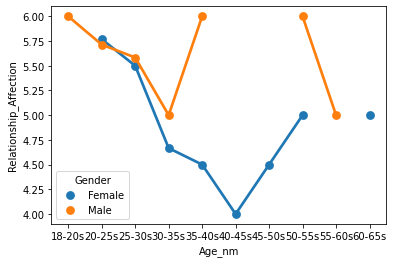

In [158]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Affection', hue='Gender', data=abc)

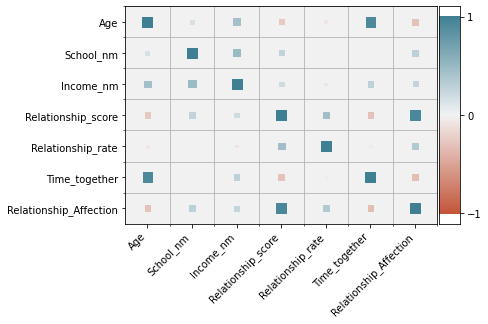

In [159]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Affection']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

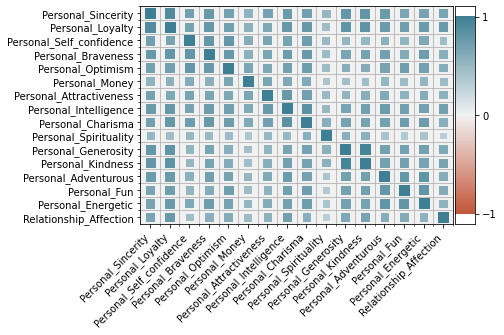

In [160]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Affection']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Appreciation

In [161]:
anova_test('Relationship_Appreciation', 'Age', data)

  Source  ddof1  ddof2     F  p-unc    np2
0    Age     24     45  2.17  0.012  0.537


In [162]:
anova_test('Relationship_Appreciation', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.304  0.027  0.257


In [163]:
anova_test('Relationship_Appreciation', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc   np2
0  School_nm      5     64  4.264  0.002  0.25


In [164]:
anova_test('Relationship_Appreciation', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  2.602  0.026  0.199


In [165]:
anova_test('Relationship_Appreciation', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.981  0.164  0.028


In [166]:
anova_test('Relationship_Appreciation', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  16.498    0.0  0.914


In [167]:
anova_test('Relationship_Appreciation', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  6.451  0.001  0.227


In [168]:
anova_test('Relationship_Appreciation', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.933  0.579  0.475


In [169]:
anova_test('Relationship_Appreciation', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4129.140  24.0  172.047  302.090  0.000  0.995
1        Gender     0.036   1.0    0.036    0.064  0.802  0.002
2  Age * Gender    73.544  24.0    3.064    5.381  0.000  0.787
3      Residual    19.933  35.0    0.570      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


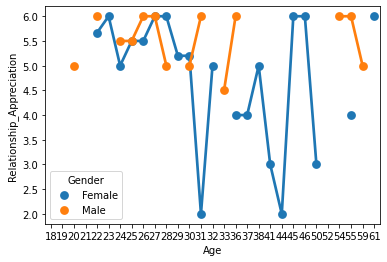

In [171]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Appreciation', hue='Gender', data=abc)

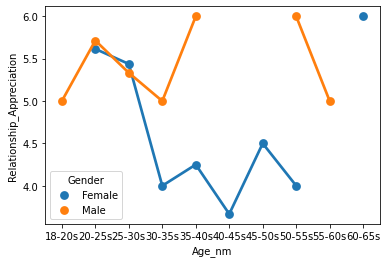

In [173]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Appreciation', hue='Gender', data=abc)

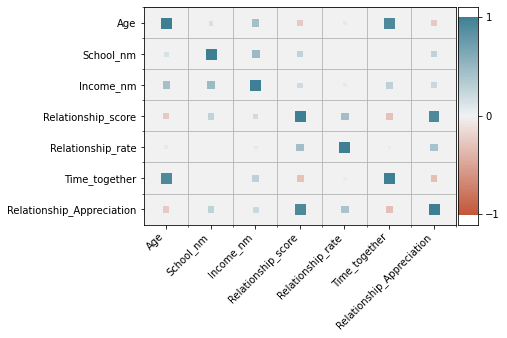

In [174]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Appreciation']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

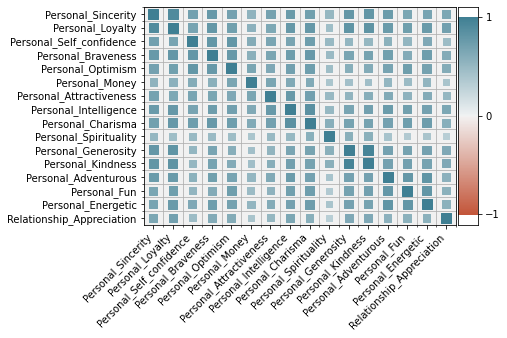

In [175]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Appreciation']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Validation

In [176]:
anova_test('Relationship_Validation', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.476  0.004  0.569


In [177]:
anova_test('Relationship_Validation', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.136   0.04  0.243


In [178]:
anova_test('Relationship_Validation', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.638  0.031  0.171


In [179]:
anova_test('Relationship_Validation', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.466  0.204  0.123


In [180]:
anova_test('Relationship_Validation', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.663  0.202  0.024


In [181]:
anova_test('Relationship_Validation', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  13.623    0.0  0.898


In [182]:
anova_test('Relationship_Validation', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  7.483    0.0  0.254


In [183]:
anova_test('Relationship_Validation', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc   np2
0  Time_together     34     35  1.207  0.291  0.54


In [184]:
anova_test('Relationship_Validation', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4095.188  24.0  170.633  250.755  0.000  0.994
1        Gender     0.006   1.0    0.006    0.009  0.926  0.000
2  Age * Gender    71.222  24.0    2.968    4.361  0.000  0.749
3      Residual    23.817  35.0    0.680      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


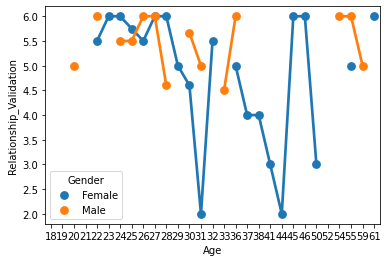

In [185]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Validation', hue='Gender', data=abc)

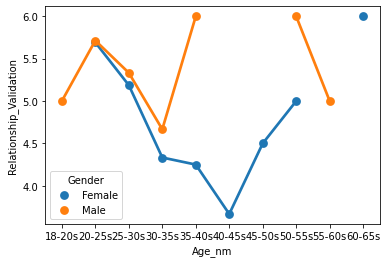

In [186]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Validation', hue='Gender', data=abc)

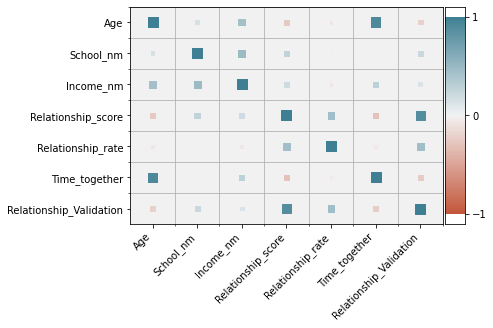

In [187]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Validation']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

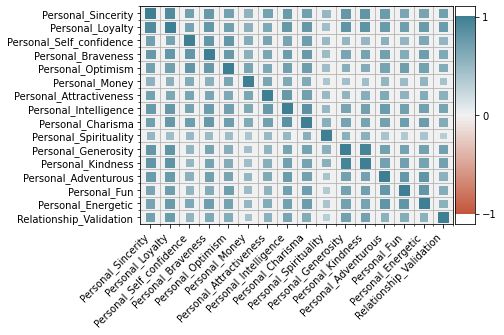

In [188]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Validation']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Freedom

In [189]:
anova_test('Relationship_Freedom', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.983  0.023  0.514


In [190]:
anova_test('Relationship_Freedom', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  1.654  0.121  0.199


In [191]:
anova_test('Relationship_Freedom', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.463  0.042  0.161


In [192]:
anova_test('Relationship_Freedom', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  0.977  0.448  0.085


In [193]:
anova_test('Relationship_Freedom', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  0.321  0.573  0.005


In [194]:
anova_test('Relationship_Freedom', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  12.032    0.0  0.886


In [195]:
anova_test('Relationship_Freedom', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  7.261    0.0  0.248


In [196]:
anova_test('Relationship_Freedom', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.888  0.634  0.463


In [197]:
anova_test('Relationship_Freedom', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4292.290  24.0  178.845  239.220  0.000  0.994
1        Gender     0.537   1.0    0.537    0.719  0.402  0.020
2  Age * Gender    64.534  24.0    2.689    3.597  0.000  0.712
3      Residual    26.167  35.0    0.748      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


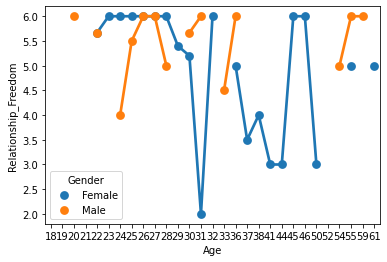

In [199]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Freedom', hue='Gender', data=abc)

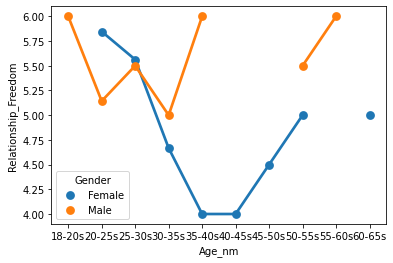

In [200]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Freedom', hue='Gender', data=abc)

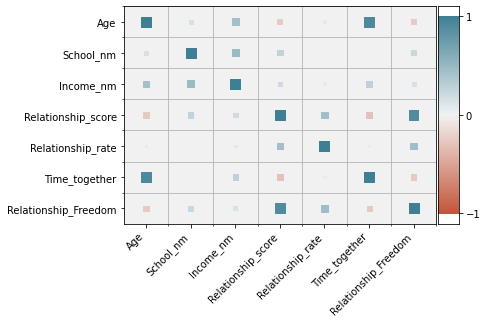

In [201]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Freedom']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

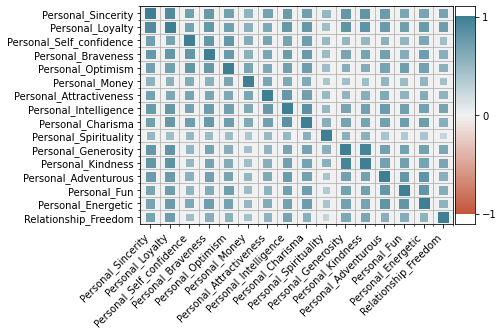

In [202]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Freedom']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Relationship_Alone

In [203]:
anova_test('Relationship_Alone', 'Age', data)

  Source  ddof1  ddof2    F  p-unc   np2
0    Age     24     45  2.7  0.002  0.59


In [204]:
anova_test('Relationship_Alone', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.941  0.006  0.306


In [205]:
anova_test('Relationship_Alone', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.061  0.082  0.139


In [206]:
anova_test('Relationship_Alone', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.362  0.244  0.115


In [207]:
anova_test('Relationship_Alone', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  0.778  0.381  0.011


In [208]:
anova_test('Relationship_Alone', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  7.003    0.0  0.818


In [209]:
anova_test('Relationship_Alone', 'Relationship_rate', data)

              Source  ddof1  ddof2     F  p-unc    np2
0  Relationship_rate      3     66  4.76  0.005  0.178


In [210]:
anova_test('Relationship_Alone', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  1.014  0.483  0.496


In [211]:
anova_test('Relationship_Alone', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  4075.971  24.0  169.832  257.880  0.000  0.994
1        Gender     0.118   1.0    0.118    0.179  0.675  0.005
2  Age * Gender    45.797  24.0    1.908    2.897  0.002  0.665
3      Residual    23.050  35.0    0.659      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


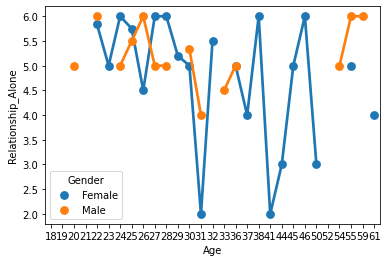

In [213]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Relationship_Alone', hue='Gender', data=abc)

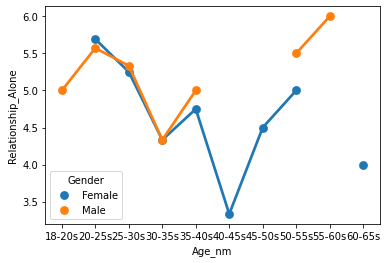

In [214]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Relationship_Alone', hue='Gender', data=abc)

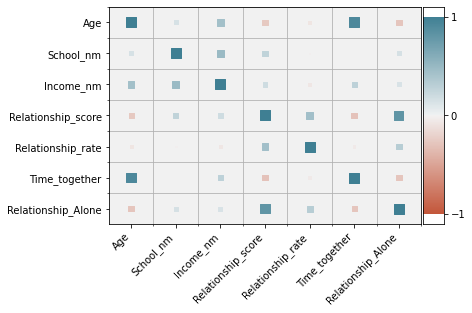

In [215]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Relationship_Alone']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

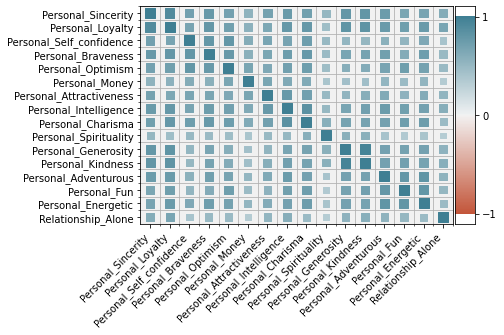

In [216]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Relationship_Alone']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

In [ ]:
#######################

In [ ]:
anova_test('Future_Partner_Energetic', 'Age', data)

anova_test('Future_Partner_Energetic', 'Age_nm', data)

anova_test('Future_Partner_Energetic', 'School_nm', data)

anova_test('Future_Partner_Energetic', 'Income_nm', data)

anova_test('Future_Partner_Energetic', 'Gender', data)

anova_test('Future_Partner_Energetic', 'Relationship_score', data)

anova_test('Future_Partner_Energetic', 'Relationship_rate', data)

anova_test('Future_Partner_Energetic', 'Time_together', data)

anova_test('Future_Partner_Energetic', ['Age','Gender'], data)

abc = data.groupby(['Age'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Energetic', hue='Gender', data=abc)

abc = data.groupby(['Age_nm'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Energetic', hue='Gender', data=abc)

df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together',
                  'Future_Partner_Energetic']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness',
                  'Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence',
                  'Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness',
                  'Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Energetic']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

In [14]:
"""['Age',
 'Gender',
 'Sexual_orientation',
 'School',
 'Religion',
 'Income',
 
 'ID',
 'Age_nm',
 'School_nm',
 'Income_nm',
 
 'Relationship_score',
'Relationship_rate',
 'Time_together',
 'Kids',

 'Opposite_sex_Sincerity',
 'Opposite_sex_Loyalty',
 'Opposite_sex_Self_confidence',
 'Opposite_sex_Braveness',
 'Opposite_sex_Optimism',
 'Opposite_sex_Money',
 'Opposite_sex_Attractiveness',
 'Opposite_sex_Intelligence',
 'Opposite_sex_Charisma',
 'Opposite_sex_Spirituality',
 'Opposite_sex_Generosity',
 'Opposite_sex_Kindness',
 'Opposite_sex_Adventurous',
 'Opposite_sex_Fun',
 'Opposite_sex_Energetic',
 
 'Partner_values_Sincerity',
 'Partner_values_Loyalty',
 'Partner_values_Self_confidence',
 'Partner_values_Braveness',
 'Partner_values_Optimism',
 'Partner_values_Money',
 'Partner_values_Attractiveness',
 'Partner_values_Intelligence',
 'Partner_values_Charisma',
 'Partner_values_Spirituality',
 'Partner_values_Generosity',
 'Partner_values_Kindness',
 'Partner_values_Adventurous',
 'Partner_values_Fun',
 'Partner_values_Energetic',
 

 

 'Sincerity_dif',
 'Loyalty_dif',
 'Self_dif',
 'Braveness_dif',
 'Optimism_dif',
 'Money_dif',
 'Attractiveness_dif',
 'Intelligence_dif',
 'Charisma_dif',
 'Spirituality_dif',
 'Generosity_dif',
 'Kindness_dif',
 'Adventurous_dif',
 'Fun_dif',
 'Energetic_dif',
 'Sincerity_val',
 'Loyalty_val',
 'Self_val',
 'Braveness_val',
 'Optimism_val',
 'Money_val',
 'Attractiveness_val',
 'Intelligence_val',
 'Charisma_val',
 'Spirituality_val',
 'Generosity_val',
 'Kindness_val',
 'Adventurous_val',
 'Fun_val',
 'Energetic_val']"""

"['Age',\n 'Gender',\n 'Sexual_orientation',\n 'School',\n 'Religion',\n 'Income',\n 'Personal_Sincerity',\n 'Personal_Loyalty',\n 'Personal_Self_confidence',\n 'Personal_Braveness',\n 'Personal_Optimism',\n 'Personal_Money',\n 'Personal_Attractiveness',\n 'Personal_Intelligence',\n 'Personal_Charisma',\n 'Personal_Spirituality',\n 'Personal_Generosity',\n 'Personal_Kindness',\n 'Personal_Adventurous',\n 'Personal_Fun',\n 'Personal_Energetic',\n 'Relationship',\n 'Future_Partner_Sincerity',\n 'Future_Partner_Loyalty',\n 'Future_Partner_Self_confidence',\n 'Future_Partner_Braveness',\n 'Future_Partner_Optimism',\n 'Future_Partner_Money',\n 'Future_Partner_Attractiveness',\n 'Future_Partner_Intelligence',\n 'Future_Partner_Charisma',\n 'Future_Partner_Spirituality',\n 'Future_Partner_Generosity',\n 'Future_Partner_Kindness',\n 'Future_Partner_Adventurous',\n 'Future_Partner_Fun',\n 'Future_Partner_Energetic',\n 'Opposite_sex_Sincerity',\n 'Opposite_sex_Loyalty',\n 'Opposite_sex_Self_conf

In [ ]:
 'Personal_Sincerity',
 'Personal_Loyalty',
 'Personal_Self_confidence',
 'Personal_Braveness',
 'Personal_Optimism',
 'Personal_Money',
 'Personal_Attractiveness',
 'Personal_Intelligence',
 'Personal_Charisma',
 'Personal_Spirituality',
 'Personal_Generosity',
 'Personal_Kindness',
 'Personal_Adventurous',
 'Personal_Fun',
 'Personal_Energetic',
 
 'Relationship',

 'Future_Partner_Sincerity',
 'Future_Partner_Loyalty',
 'Future_Partner_Self_confidence',
 'Future_Partner_Braveness',
 'Future_Partner_Optimism',
 'Future_Partner_Money',
 'Future_Partner_Attractiveness',
 'Future_Partner_Intelligence',
 'Future_Partner_Charisma',
 'Future_Partner_Spirituality',
 'Future_Partner_Generosity',
 'Future_Partner_Kindness',
 'Future_Partner_Adventurous',
 'Future_Partner_Fun',
 'Future_Partner_Energetic',
  


 'Relationship_Respect',
 'Relationship_Vulnerability',
 'Relationship_Trust',
 'Relationship_Honesty',
 'Relationship_Kindness',
 'Relationship_Boundaries',
 'Relationship_Commitment',
 'Relationship_Thoughtfulness',
 'Relationship_Forgiveness',
 'Relationship_Gentleness',
 'Relationship_Affection',
 'Relationship_Appreciation',
 'Relationship_Validation',
 'Relationship_Freedom',
 'Relationship_Alone',
 
 'Relationship_type',